In [ ]:
# Librerias
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Nos conectamos a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos CSV
df_orders = pd.read_csv("/content/drive/Shareddrives/Data_TFM/orders_2023_22_21.csv", sep="	", decimal=".")

<ipython-input-3-51352ff7a553>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orders = pd.read_csv("/content/drive/Shareddrives/Data_TFM/orders_2023_22_21.csv", sep="	", decimal=".")


In [ ]:
df_venues = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")

<ipython-input-4-82da65af29b1>:1: DtypeWarning: Columns (21,25,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_venues = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")


In [ ]:
# Convertimos date de Orders a formato
df_orders['date_day_r'] = pd.to_datetime(df_orders[['year', 'month']].assign(day=1))
df_orders['date_day_r'] = pd.to_datetime(df_orders['date_day_r']).dt.to_period('M')
df_orders.head()

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product,gross_orders,gross_item_eur_amount_ttv,gross_aov,gross_revenue_eur,gross_take_rate,cancelled_orders,cancelled_item_eur_amount_ttv,cancelled_aov,cancelled_revenue_eur,cancelled_take_rate,date_day_r
0,11000371652,2023.0,3.0,Marketplace,1.Newbie,Pay at venue,tw_connect,5,615.386107,123.077221,123.08,0.20000451524135626,1,234.915355185,234.915355185,46.980000000000004,0.1999869270486913,2023-03
1,11000368856,2023.0,3.0,Marketplace,3.Explorer,PayPal,tw_connect,5,83.000000,16.600000,29.05,0.35000000000000003,2,83.0,41.5,29.05,0.35000000000000003,2023-03
2,11000326634,2023.0,3.0,Marketplace,4.Loyal,Apple Pay,tw_connect,15,264.000000,17.600000,5.28,0.02,1,36.5,36.5,0.73,0.02,2023-03
3,11000389488,2023.0,3.0,Marketplace,4.Loyal,Apple Pay,tw_connect,22,349.000000,15.863636,6.98,0.020000000000000004,2,27.0,13.5,0.54,0.02,2023-03
4,11000333360,2023.0,3.0,Widget,4.Loyal,Pay at venue,tw_connect,113,500.010000,4.424867,0.00,0.0,10,65.01,6.501,0.0,0.0,2023-03


In [ ]:
df_venues['date_day'] = pd.to_datetime(df_venues['date_day'])
df_venues["date_day_r"] = df_venues['date_day'] - dt.timedelta(weeks=4)
df_venues['date_day_r'] = pd.to_datetime(df_venues['date_day_r']).dt.to_period('M')
df_venues.head()

,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan,date_day_r
0,2021-07-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False,2021-06
1,2021-08-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False,2021-07
2,2021-09-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False,2021-08
3,2021-10-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False,2021-09
4,2021-11-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False,2021-10


In [ ]:
df = pd.merge(df_orders, df_venues, on=["unique_venue_id", "date_day_r"])
df.head()

,unique_venue_id,year,month,content_channel_name,online_order_segment,payment_method_name,saas_product_x,gross_orders,gross_item_eur_amount_ttv,gross_aov,...,plan_active_from,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan
0,11000273253,2022.0,6.0,Marketplace,3.Explorer,Gift Card,tw_connect,1,110.11450,110.114500,...,2022-01-31 19:21:38,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,33.6139,False
1,11000273253,2022.0,6.0,Marketplace,3.Explorer,Credit Card,tw_connect,1,110.11450,110.114500,...,2022-01-31 19:21:38,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,33.6139,False
2,11000280961,2022.0,6.0,Marketplace,4.Loyal,Apple Pay,tw_connect,2,100.03033,50.015165,...,2022-01-31 19:30:27,2999-12-31 00:00:00,0,(null),0,(null),1,Plus,56.7959,False
3,11000280961,2022.0,6.0,Book With Google,4.Loyal,Pay at venue,tw_connect,3,193.56970,64.523233,...,2022-01-31 19:30:27,2999-12-31 00:00:00,0,(null),0,(null),1,Plus,56.7959,False
4,11000280961,2022.0,6.0,Marketplace,1.Newbie,Apple Pay,tw_connect,1,44.50944,44.509440,...,2022-01-31 19:30:27,2999-12-31 00:00:00,0,(null),0,(null),1,Plus,56.7959,False


In [ ]:
# Valores 'na' en nuestro Dataset de disabled_date (80%), son venues que están activos,
#substituimos estos valores con 0 en nuestro dataset, una vez transformados a datetime se catalogan como 1-1-1970
#que nunca serán mayores con nuestro latest_live_date y por lo tanto churn=0 para estos casosdf['disabled_date'].fillna(0, inplace=True)

df['disabled_date'].fillna(0, inplace=True)

# Conversión de la columna 'disabled_date' al formato de fecha
df['disabled_date'] = pd.to_datetime(df['disabled_date'], errors='coerce')

# Elimino los registros que tienen valores NaN en la columna 'latest_live_date', ya que parecen ser errores en los datos
df.dropna(subset=['latest_live_date'], inplace=True)

# Convertimos la columna 'latest_live_date' al formato de fecha
df['latest_live_date'] = pd.to_datetime(df['latest_live_date'], errors='coerce')

# Creamos una nueva columna 'mes' a partir de la columna 'date_time'
df['mes'] = df['latest_live_date'].dt.to_period('M')

# Calculamos el churn por cada mes
tres_meses = df['latest_live_date'] + pd.DateOffset(months=3)
df['churn'] = np.where(df['disabled_date'] > tres_meses, 1, 0)

# Verificamos el resultado
print(df[['mes', 'churn']])

            mes  churn
0       2014-05      0
1       2014-05      0
2       2020-02      0
3       2020-02      0
4       2020-02      0
...         ...    ...
144179  2020-03      0
144180  2021-10      0
144181  2021-10      0
144182  2022-11      0
144183  2022-11      0

[143522 rows x 2 columns]


In [ ]:
df.churn.mean()

0.005420771728376138

In [ ]:
df.unique_venue_id.nunique()

27900

In [ ]:
# Transformar los strings %null% en valores NaN
df = df.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

In [ ]:
# Obtener el % de valores NaN de cada variable del último mes
null_percentages = round((df.isnull().sum() * 100) / df.shape[0], 2)
null_df = null_percentages.to_frame(name='Porcentaje de Nulos').reset_index()
null_df.rename(columns={'index': 'Columna'}, inplace=True)
print(null_df.to_string())

                                 Columna  Porcentaje de Nulos
0                        unique_venue_id                 0.00
1                                   year                 0.00
2                                  month                 0.00
3                   content_channel_name                 0.00
4                   online_order_segment                 0.00
5                    payment_method_name                 1.35
6                         saas_product_x                 0.00
7                           gross_orders                 0.00
8              gross_item_eur_amount_ttv                 0.00
9                              gross_aov                 0.00
10                     gross_revenue_eur                 0.00
11                       gross_take_rate                 1.39
12                      cancelled_orders                78.41
13         cancelled_item_eur_amount_ttv                78.41
14                         cancelled_aov                78.41
15      

In [ ]:
df_subset=df[['payment_method_name', 'online_order_segment', 'gross_orders', 'cancelled_orders', 'churn']]

1. *Data Preprocessing*:

- 1. Consistency Check
- 2. Variable type
- 3. Variable Preprocessing
- 4. % of null

1.1. Consistency Check

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143522 entries, 0 to 144183
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   payment_method_name   141586 non-null  object
 1   online_order_segment  143522 non-null  object
 2   gross_orders          143522 non-null  int64 
 3   cancelled_orders      30980 non-null   object
 4   churn                 143522 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 6.6+ MB


In [ ]:
df_subset.payment_method_name.value_counts()

Pay at venue     48806
Apple Pay        24656
Credit Card      22568
PayPal           18332
Google Pay       11486
Gift Card         5479
iDeal_intent      3552
Discount code     3349
iDeal             1705
Bancontact        1081
SOFORT             498
Credit Note         74
Name: payment_method_name, dtype: int64

In [ ]:
df_subset.online_order_segment.value_counts()

4.Loyal       47693
3.Explorer    42132
1.Newbie      30715
2.Referral    22982
Name: online_order_segment, dtype: int64

In [ ]:
df_subset.gross_orders.value_counts()

1      98017
2      24851
3       9469
4       4694
5       2308
       ...  
54         1
172        1
62         1
198        1
85         1
Name: gross_orders, Length: 74, dtype: int64

In [ ]:
df_subset.cancelled_orders.value_counts()

1      25837
2       3602
3        895
4        319
5        132
6         57
7         41
8         35
9         14
12        10
10         9
11         7
13         4
15         3
16         3
17         3
66         2
21         2
18         1
22         1
63         1
125        1
30         1
Name: cancelled_orders, dtype: int64

1.2. Variable Preprocessing

In [ ]:
df_subset['cancelled_orders'].fillna(0, inplace=True)

# Cambio de tipo de variable

df_subset['cancelled_orders'] = df_subset['cancelled_orders'].astype(int)

<ipython-input-20-7fba806c8519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cancelled_orders'].fillna(0, inplace=True)
<ipython-input-20-7fba806c8519>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cancelled_orders'] = df_subset['cancelled_orders'].astype(int)


2. EDA
2.1. Definition
2.2. Univariate Analysis
2.3. Bivariate Analysis with churn
2.4. Significance Test

**Payment_Method_Name**



```
# This is formatted as code
```

La variable 'payment_method_name' representa los diferentes métodos de pago utilizados por los clientes en Treatwell.

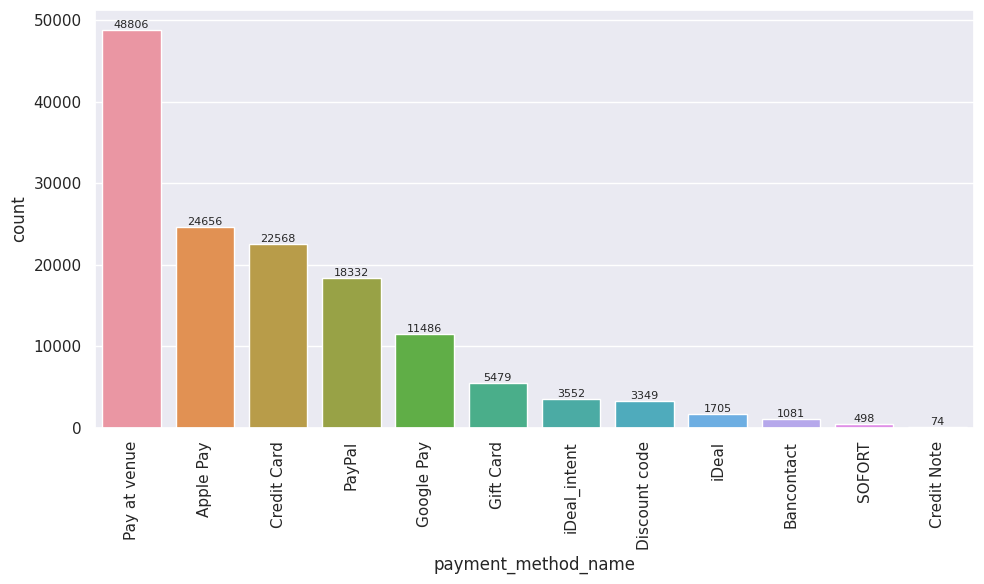

In [ ]:
bplt.figure(figsize=(10, 6))
sns.countplot(x='payment_method_name', data=df_subset, order=df_subset['payment_method_name'].value_counts().index)
plt.xticks(rotation=90)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


Juntar variables pay at venue, discount code, gift card, i

In [ ]:
df_subset.payment_method_name.value_counts()

Pay at venue     48806
Apple Pay        24656
Credit Card      22568
PayPal           18332
Google Pay       11486
Gift Card         5479
iDeal_intent      3552
Discount code     3349
iDeal             1705
Bancontact        1081
SOFORT             498
Credit Note         74
Name: payment_method_name, dtype: int64

**Online Order Segment**

La variable 'online_order_segment' representa diferentes segmentos de clientes en función de su comportamiento de pedidos en línea en Treatwell. Estos segmentos incluyen:

- Loyal: Clientes que han realizado pedidos en línea de manera consistente y frecuente. Son clientes fieles y habituales de Treatwell.

- Explorer: Clientes que realizan pedidos en línea de manera regular, pero no con la misma frecuencia que los leales. Estos clientes están en la fase de exploración y pueden probar diferentes servicios.

- Newbie: Clientes que son nuevos en el servicio y han realizado solo unos pocos pedidos en línea. Son clientes nuevos en Treatwell y están en la etapa inicial de descubrimiento.

- Referral: Clientes que han sido referidos por otros clientes. Han realizado pedidos en línea pero no son tan frecuentes como los leales o exploradores.

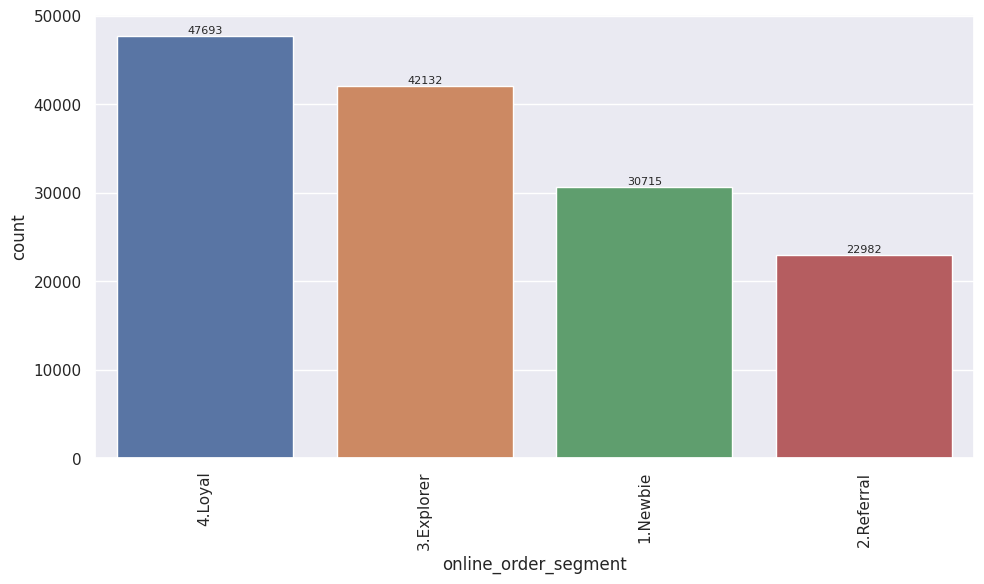

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='online_order_segment', data=df_subset, order=df_subset['online_order_segment'].value_counts().index)
plt.xticks(rotation=90)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Añadir definición de cada grupo, especifica


In [ ]:
df_subset.online_order_segment.value_counts()

4.Loyal       47693
3.Explorer    42132
1.Newbie      30715
2.Referral    22982
Name: online_order_segment, dtype: int64

**Gross Orders**

La variable "gross_orders" representa el número de pedidos brutos realizados por los clientes en Treatwell.

In [ ]:
df_subset.gross_orders.describe()

count    143522.000000
mean          1.736542
std           3.776274
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         797.000000
Name: gross_orders, dtype: float64

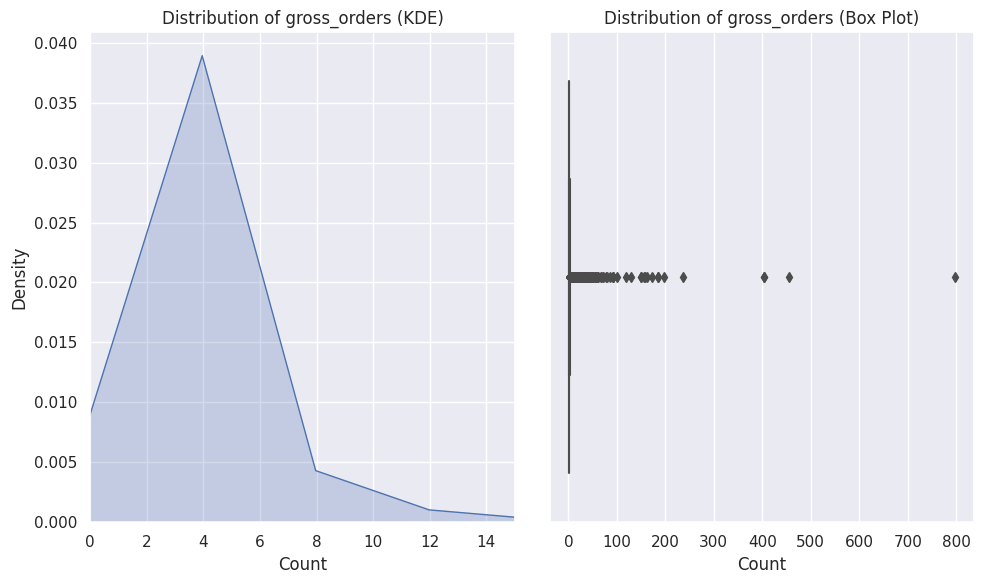

In [ ]:
plt.figure(figsize=(10, 6))

# KDE plot
plt.subplot(121)
sns.kdeplot(data=df_subset, x='gross_orders', fill=True)
plt.title('Distribution of gross_orders (KDE)', fontsize=12)
plt.xlim(0, 15)
plt.xlabel('Count')

# Box plot
plt.subplot(122)
sns.boxplot(data=df_subset, x='gross_orders')
plt.title('Distribution of gross_orders (Box Plot)', fontsize=12)
plt.xlabel('Count')

plt.tight_layout()
plt.show()

La distribución de la variable "gross_orders" muestra que la mayoría de los clientes han realizado 1 o 2 pedidos, con algunos casos extremos que han realizado un número significativamente mayor de pedidos

**Cancelled_orders**

In [ ]:
df_subset.cancelled_orders.describe()

count    143522.000000
mean          0.275999
std           0.793097
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         125.000000
Name: cancelled_orders, dtype: float64

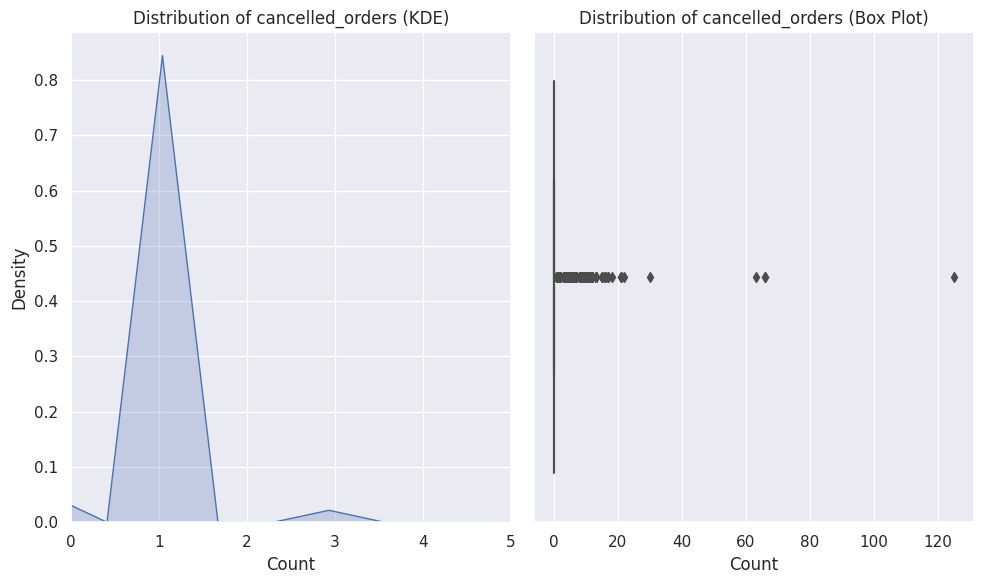

In [ ]:
plt.figure(figsize=(10, 6))

# KDE plot
plt.subplot(121)
sns.kdeplot(data=df_subset, x='cancelled_orders', fill=True)
plt.title('Distribution of cancelled_orders (KDE)', fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Count')

# Box plot
plt.subplot(122)
sns.boxplot(data=df_subset, x='cancelled_orders')
plt.title('Distribution of cancelled_orders (Box Plot)', fontsize=12)
plt.xlabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-29-30d946271998>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cancelled_orders'] = df_subset['cancelled_orders'].astype(float)


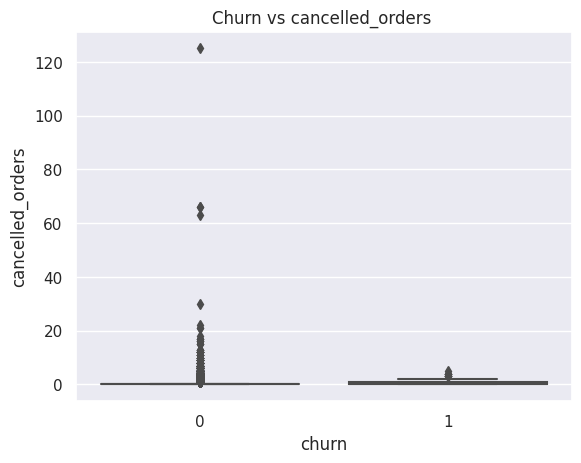

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset['cancelled_orders'] = df_subset['cancelled_orders'].astype(float)

sns.boxplot(data=df_subset, x='churn', y='cancelled_orders')

plt.title('Churn vs cancelled_orders ', fontsize=12)

plt.show()

In [ ]:
df.churn.mean()

0.005420771728376138